### Do your work for this exercise in a notebook named `explore`. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.
- For both datasets you should choose a method of splitting your data and only explore the training split.
- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime
from time import strftime

import warnings
warnings.filterwarnings("ignore")

import acquire, prepare

### Explore store demand dataset

In [2]:
# Acquire the data
store = acquire.get_store_data()

# Print the shape and the head
print(store.shape)
store.head(3)

(913000, 14)


,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
# Prepare the data
store = prepare.prep_store(store)

# Print the shape and the head
print(store.shape)
store.head(3)

(913000, 16)


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55


**Takeaways**
1. Target var: sales_totla
2. Categoricals: 
    - store_address, store_id, store_zipcode
    - item_brand, item_name
    - month, day_of_week
3. Numerics:
    - quantity(sale_amount)
    - item_price

In [22]:
store.store_city.value_counts()

San Antonio    913000
Name: store_city, dtype: int64

In [4]:
# Summarize the data

print('Date Range:', store.index.min(), 'to', store.index.max())
print('Shape:', store.shape) # 5 years of data

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (913000, 16)


In [5]:
# Any missing values?
(store.isna()).any().any() # No missing values are found

False

In [6]:
# How many records per day on average?
913000/5/365 # More than 500

500.2739726027397

In [8]:
# Human-based splitting
train = store[:'2016'] # inclues 2016
test = store['2017']

# Print the shapes
print(train.shape, test.shape)

(730500, 16) (182500, 16)


In [28]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

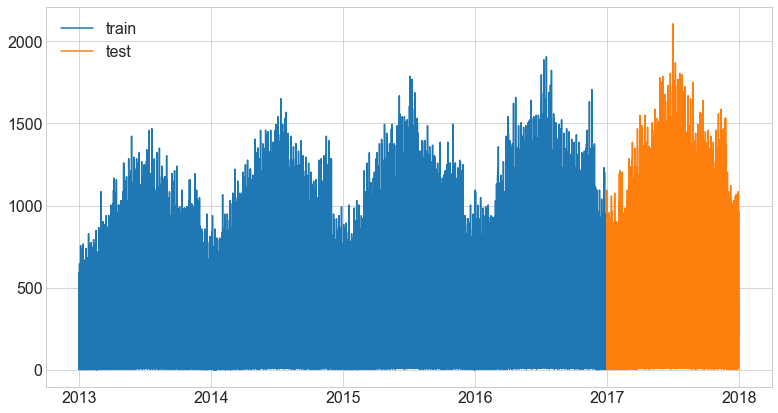

In [13]:
# Visualize the train and test dataset

plt.plot(train.index, train.sales_total, label='train')
plt.plot(test.index, test.sales_total, label='test')
plt.legend()

### Visualizations - Don't consider the time series

In [14]:
# Store target in a variable named y for ease of access

y = train.sales_total
print(y.shape)
y.head()

(730500,)


sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

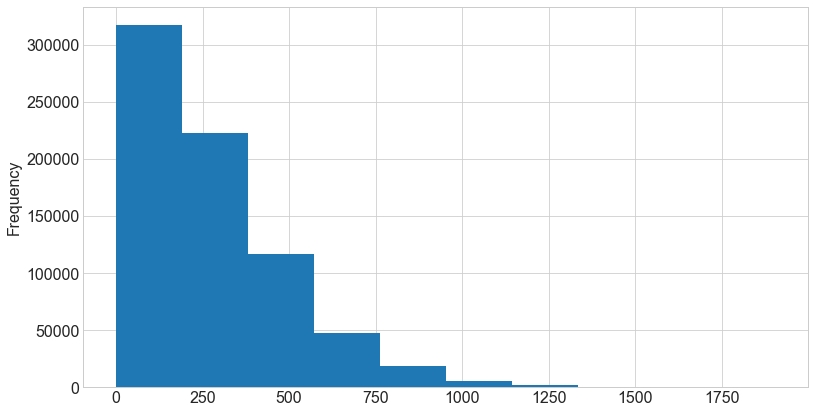

In [15]:
# Histogram of target var y
y.plot.hist()

[Text(0, 0.5, 'Dollar($)'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average sales by Month')]

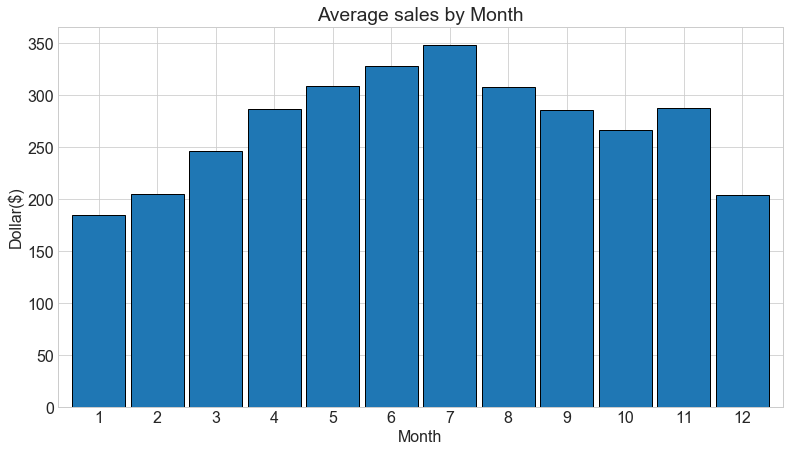

In [16]:
ax = y.groupby(y.index.month).mean().plot.bar(width=0.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by Month', xlabel='Month', ylabel='Dollar($)')

[Text(0, 0.5, 'Dollar($)'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Average Sales by Weekday')]

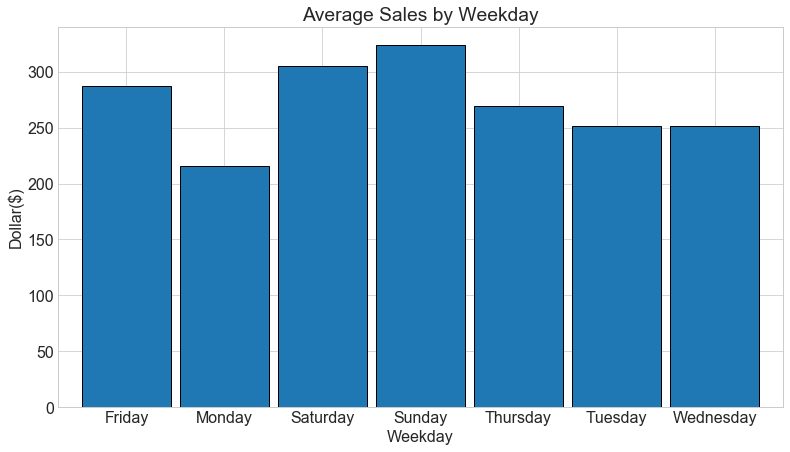

In [17]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=0.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Weekday', xlabel='Weekday', ylabel='Dollar($)')

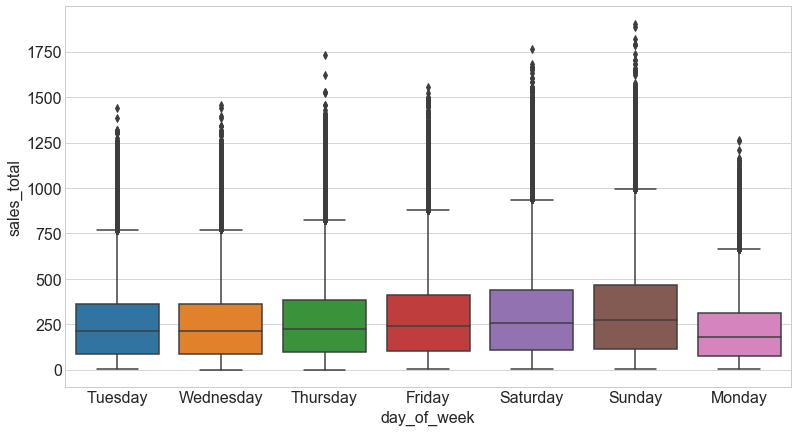

In [19]:
sns.boxplot(data=train, y='sales_total', x='day_of_week')

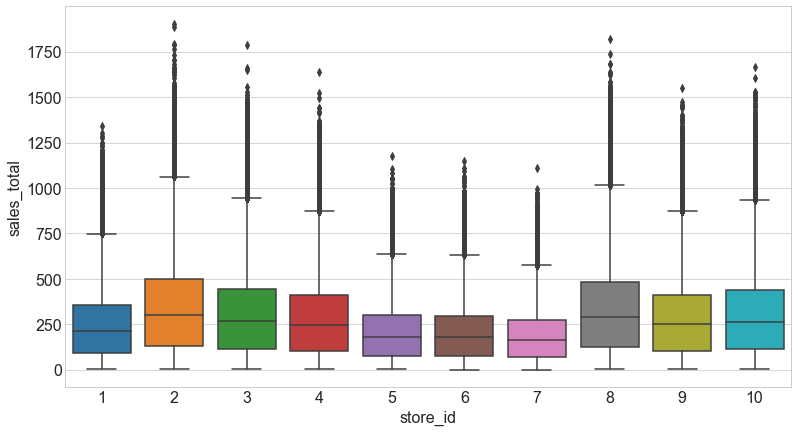

In [20]:
sns.boxplot(data=train, y='sales_total', x='store_id')

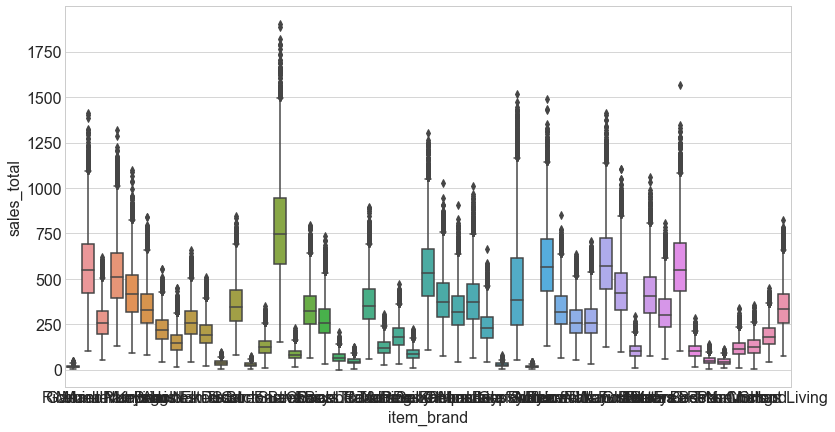

In [25]:
sns.boxplot(data=train, y='sales_total', x='item_brand')

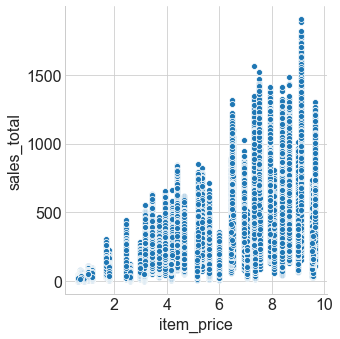

In [29]:
sns.relplot(data=train, y='sales_total', x='item_price')

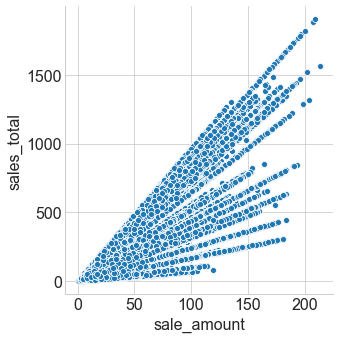

In [30]:
sns.relplot(data=train, y='sales_total', x='sale_amount')

### Visualize the target y (sales_total) over time

In [39]:
y.groupby(y.index).size() # 500 records every day. 

sale_date
2013-01-01    500
2013-01-02    500
2013-01-03    500
2013-01-04    500
2013-01-05    500
             ... 
2016-12-27    500
2016-12-28    500
2016-12-29    500
2016-12-30    500
2016-12-31    500
Name: sales_total, Length: 1461, dtype: int64

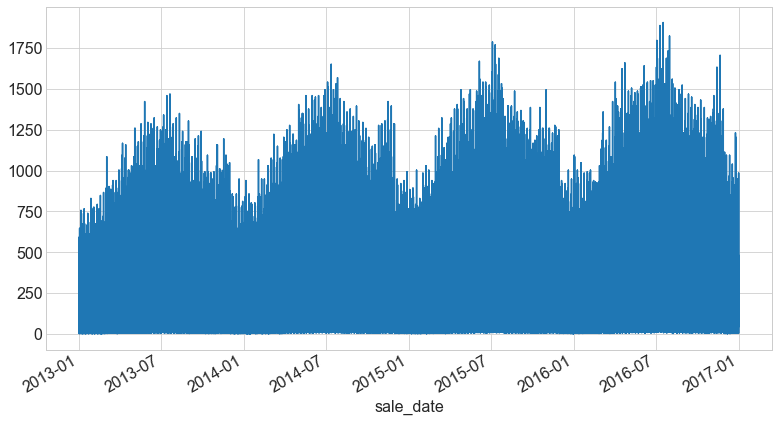

In [51]:
y.plot() # Because there has 500 records every day

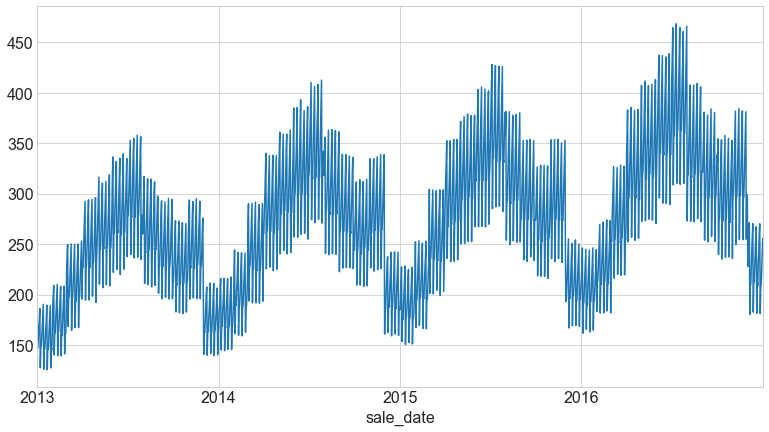

In [52]:
# Resample by day and plot the mean over time
y.resample('D').mean().plot()

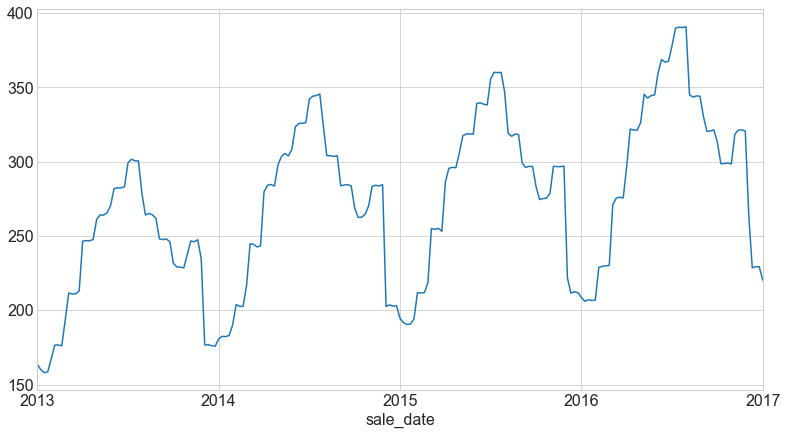

In [32]:
# Resample by week and plot the mean over time
y.resample('W').mean().plot()

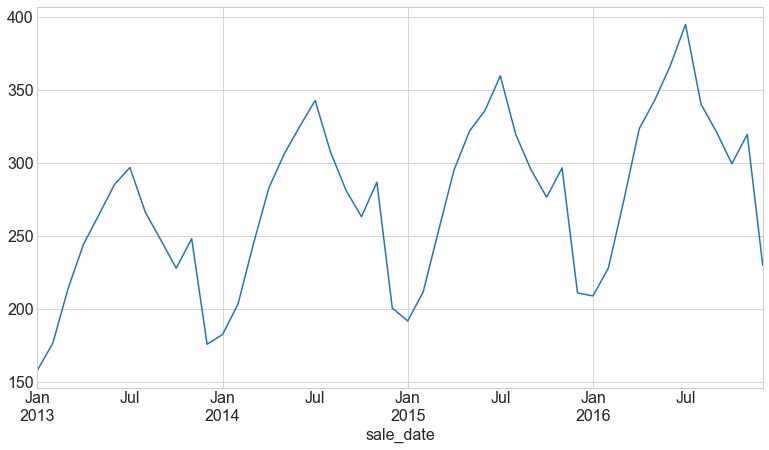

In [33]:
y.resample('M').mean().plot()

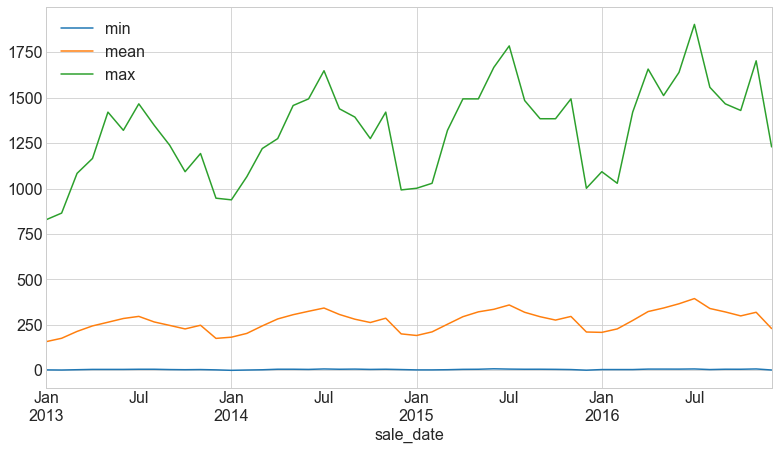

In [34]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

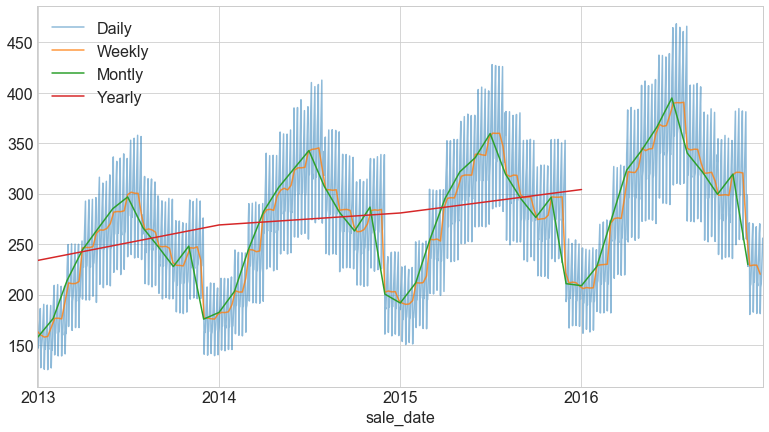

In [36]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

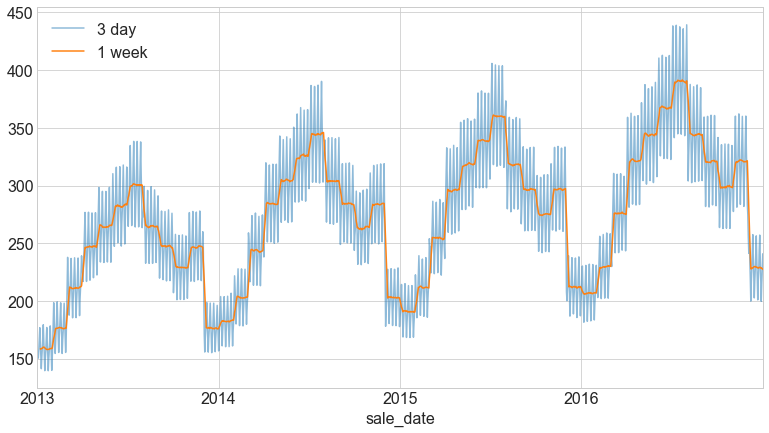

In [42]:
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Change over time
- Month
- Week

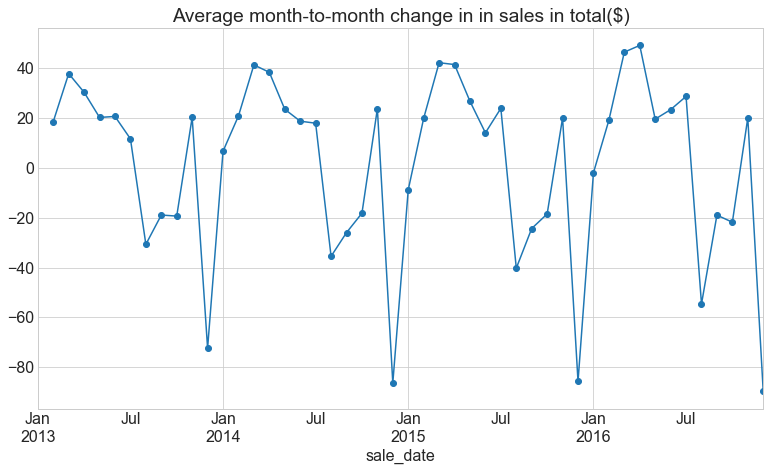

In [53]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in in sales in total($)', marker='o')

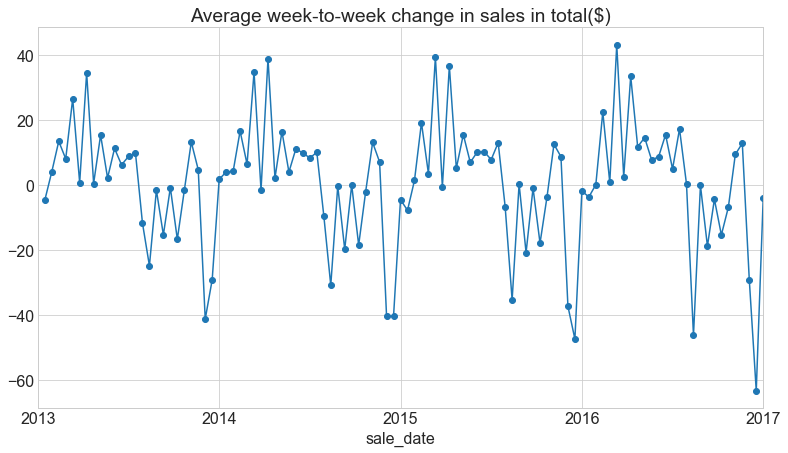

In [55]:
y.resample('2W').mean().diff().plot(title='Average week-to-week change in sales in total($)', marker='o')

### Seasonal Plot

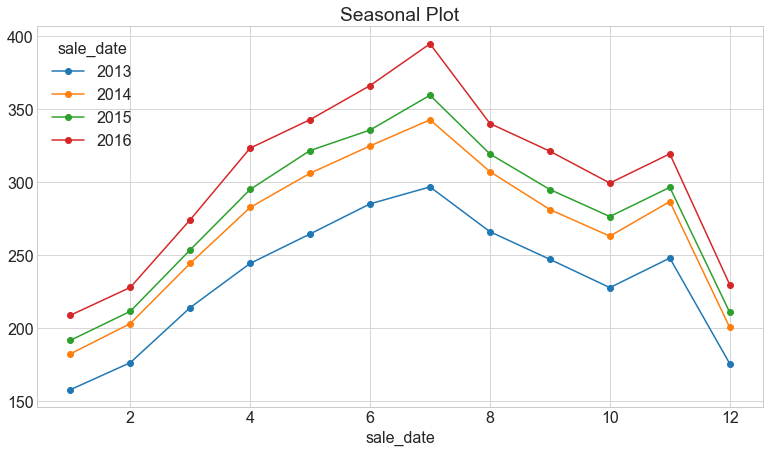

In [56]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', marker='o')

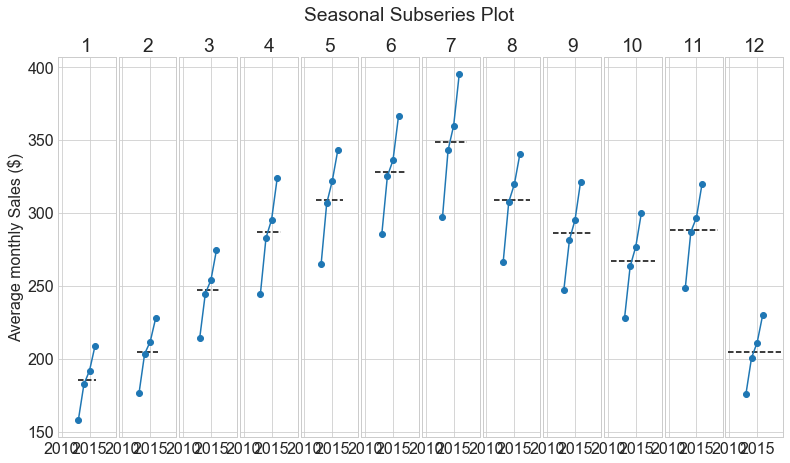

In [57]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month, marker='o')
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Average monthly Sales ($)')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=.05)

### Autocorrealtion Plot - time unit: week

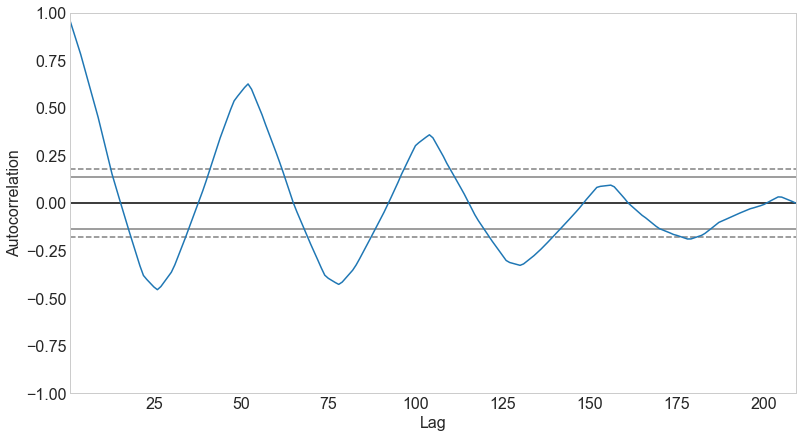

In [50]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())